In [1]:
import pandas as pd

In [176]:
df_features = pd.read_csv('df_features.csv')

In [177]:
df_features.dtypes

Title                  object
Subtitle               object
Image                   int64
Author                 object
Publication            object
Year                    int64
Month                   int64
Day                     int64
Tag                    object
Reading_Time            int64
Claps                 float64
Comment                 int64
no_of_blockquotes       int64
no_of_bolded_text       int64
no_of_italics_text      int64
no_of_figures_text      int64
no_of_code_chunks       int64
compound_senti        float64
neg_senti             float64
neu_senti             float64
pos_senti             float64
dtype: object

In [182]:
df_features['Date'] = pd.to_datetime(df_features[["Year","Month","Day"]])

In [183]:
df_features = df_features.sort_values('Date')

In [186]:
df_features['week'] = df_features['Date'].dt.week

In [189]:
df_features.tail(100)

,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Tag,Reading_Time,...,no_of_bolded_text,no_of_italics_text,no_of_figures_text,no_of_code_chunks,compound_senti,neg_senti,neu_senti,pos_senti,Date,week
44,Knowledge Graphs @ ICLR 2020,"Hello, I hope you are all doing well during t...",1,Michael Galkin,no publication,2020,4,27,NLP,15,...,39,65,15,0,0.9998,0.031,0.871,0.098,2020-04-27,18
884,Natural Language Processing and Its impact on ...,no subtitle,1,Jeevan Jamakayala,Analytics Vidhya,2020,4,27,NLP,3,...,2,0,2,0,0.9987,0.014,0.828,0.158,2020-04-27,18
377,SPIKE-CORD,SPIKE-CORD is a powerful new tool for searchin...,1,Yoav Goldberg,AI2 Blog,2020,4,27,NLP,7,...,16,11,3,0,0.9978,0.026,0.877,0.097,2020-04-27,18
1183,Alleviate Cold Start Problem in Song Recommend...,no subtitle,1,Zhenghao Tan,no publication,2020,4,27,NLP,6,...,0,0,8,0,0.9580,0.036,0.904,0.060,2020-04-27,18
846,AI April NLP Math Teacher Challenge,TLDR; Build a model that can perform automatic...,1,AaronAri) Bornstein,Microsoft Azure,2020,4,27,NLP,2,...,1,0,2,0,0.9571,0.042,0.797,0.161,2020-04-27,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,Deep Learning for Natural Language Processing ...,Reading Comprehension using Expo,1,"Yuefeng Zhang, PhD",Towards Data Science,2020,5,1,NLP,8,...,6,32,5,12,0.9874,0.000,0.963,0.037,2020-05-01,18
551,Top Free Machine Learning Courses With Certifi...,no subtitle,1,Python Learning,no publication,2020,5,1,NLP,1,...,0,0,1,0,0.8779,0.000,0.736,0.264,2020-05-01,18
459,Transformers: A curious case of attention,In this post we will go through the intricacie...,1,Abhishek Perambai,Analytics Vidhya,2020,5,1,NLP,7,...,13,5,8,0,0.9973,0.033,0.876,0.091,2020-05-01,18
871,Five Cool Python Libraries for Data Science,Check out these 5 cool Python libraries that t...,1,Arpit Bhushan Sharma,Machine Learning with ABS,2020,5,1,NLP,5,...,45,1,8,15,0.9971,0.031,0.807,0.162,2020-05-01,18


In [264]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()

df_features_1['Title_compound_senti'] = [analyzer.polarity_scores(v)['compound'] for v in df_features_1['Title']]
df_features_1['Subtitle_compund_senti'] = [analyzer.polarity_scores(v)['compound'] for v in df_features_1['Subtitle']]


In [246]:
df_features_1['Publication'] = df_features_1['Publication'].apply(lambda x: 0 if x == 'no publication' else 1)

In [203]:
len(df_features)

1487

In [206]:
df_features.dtypes

Title                         object
Subtitle                      object
Image                          int64
Author                        object
Publication                   object
Year                           int64
Month                          int64
Day                            int64
Tag                           object
Reading_Time                   int64
Claps                        float64
Comment                        int64
no_of_blockquotes              int64
no_of_bolded_text              int64
no_of_italics_text             int64
no_of_figures_text             int64
no_of_code_chunks              int64
compound_senti               float64
neg_senti                    float64
neu_senti                    float64
pos_senti                    float64
Date                  datetime64[ns]
week                           int64
dtype: object

In [244]:
df_features_1 = df_features.drop(['Author','Year','Month','Day','Date','week'],inplace = False , axis = 1)

In [247]:
df_features_1.head(2)

,Title,Subtitle,Image,Publication,Tag,Reading_Time,Claps,Comment,no_of_blockquotes,no_of_bolded_text,no_of_italics_text,no_of_figures_text,no_of_code_chunks,compound_senti,neg_senti,neu_senti,pos_senti
190,Question Answering with PyTorch Transformers: ...,Introduction,1,0,NLP,5,152.0,0,4,1,0,1,2,0.9986,0.013,0.869,0.118
573,Can the dynamic linking of neural activations ...,Most artificial neural,1,1,NLP,10,33.0,0,0,7,1,5,0,0.9952,0.049,0.873,0.078


In [304]:
######Prediction Model

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [306]:

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [329]:
df_features_2 = df_features_1.drop(['Title','Subtitle','Tag'],inplace = False , axis = 1)

In [330]:
train_dataset = df_features_2.sample(frac=0.8,random_state=0)
test_dataset = df_features_2.drop(train_dataset.index)

In [331]:
train_stats = train_dataset.describe()
train_stats.pop("Claps")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Image,1190.0,0.887395,0.316242,0.0000,1.000000,1.00000,1.0000,1.000
Publication,1190.0,0.533613,0.499079,0.0000,0.000000,1.00000,1.0000,1.000
Reading_Time,1190.0,5.605042,3.521933,0.0000,3.000000,5.00000,7.0000,28.000
Comment,1190.0,0.037815,0.190829,0.0000,0.000000,0.00000,0.0000,1.000
no_of_blockquotes,1190.0,0.966387,2.327055,0.0000,0.000000,0.00000,1.0000,35.000
no_of_bolded_text,1190.0,12.278992,19.915789,0.0000,1.000000,6.00000,15.0000,192.000
no_of_italics_text,1190.0,7.335294,12.409918,0.0000,0.000000,3.00000,9.0000,90.000
no_of_figures_text,1190.0,6.789076,6.992250,0.0000,2.000000,5.00000,9.0000,56.000
no_of_code_chunks,1190.0,2.315126,4.723367,0.0000,0.000000,0.00000,2.0000,34.000
compound_senti,1190.0,0.839611,0.418072,-0.9995,0.962225,0.99355,0.9982,1.000


In [332]:
train_labels = train_dataset.pop('Claps')
test_labels = test_dataset.pop('Claps')

In [333]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [334]:
train_dataset.dtypes

Image                       int64
Publication                 int64
Reading_Time                int64
Comment                     int64
no_of_blockquotes           int64
no_of_bolded_text           int64
no_of_italics_text          int64
no_of_figures_text          int64
no_of_code_chunks           int64
compound_senti            float64
neg_senti                 float64
neu_senti                 float64
pos_senti                 float64
Title_compound_senti      float64
Subtitle_compund_senti    float64
dtype: object

In [335]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [336]:
model = build_model()

In [337]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [338]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.5284147 ],
       [-0.1446926 ],
       [-0.18554634],
       [-0.04293442],
       [ 0.05492554],
       [-0.72623867],
       [-1.3340945 ],
       [-1.40605   ],
       [-2.6623116 ],
       [-0.55517256]], dtype=float32)

In [340]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:24129.8320,  mae:68.3711,  mse:24129.8320,  val_loss:26363.3652,  val_mae:78.9589,  val_mse:26363.3652,  
....................................................................................................
Epoch: 100, loss:21823.1504,  mae:64.8467,  mse:21823.1504,  val_loss:26905.3828,  val_mae:82.7973,  val_mse:26905.3828,  
....................................................................................................
Epoch: 200, loss:18985.6504,  mae:61.0606,  mse:18985.6504,  val_loss:28164.6758,  val_mae:88.2098,  val_mse:28164.6758,  
....................................................................................................
Epoch: 300, loss:15939.5029,  mae:59.3760,  mse:15939.5029,  val_loss:30344.2852,  val_mae:93.7877,  val_mse:30344.2852,  
....................................................................................................
Epoch: 400, loss:13257.5635,  mae:56.6897,  mse:13257.5635,  val_loss:33568.5156,  val_mae:102.9708,  val

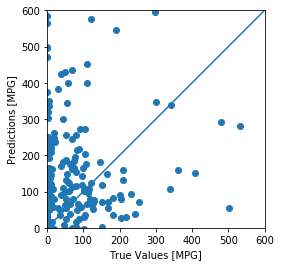

In [346]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

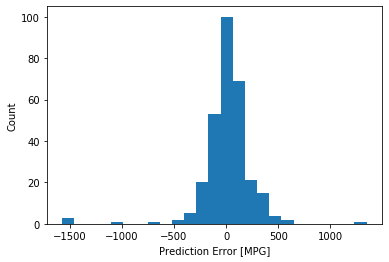

In [342]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")